## Portfolio Part 3

In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the rating column has been changed with like or dislike values. Your task is to train classification models to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item| rating | helpfulness | gender | category |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __timestamp__ - the timestamp indicating when the user rated the shopping item
* __review__ - the user's review comments of the item
* __item__ - the name of the item
* __rating__ - the user like or dislike the item
* __helpfulness__ - average rating from other users on whether the review comment is helpful. 6-helpful, 0-not helpful. 
* __gender__ - the gender of the user, F- female, M-male
* __category__ - the category of the shopping item


Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the __rating__ field in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Portfolio 3.csv')
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
5,4259,12100,Come here at least once in your life... stay a...,New York City,like,4,F,Hotels & Travel
6,4259,12400,"I joined for the free camera, and stood for no...",Earthlink,like,3,F,Online Stores & Services
7,4259,12700,They Should've Fooled the American Public,Blair Witch Project,dislike,4,F,Movies
8,4259,51600,A Short List of Things to Remember in NYC,New York City,like,4,F,Hotels & Travel
9,4259,60200,Do you know what a metaphysical can of worms t...,Being John Malkovich,like,4,F,Movies


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userId       2899 non-null   int64 
 1   timestamp    2899 non-null   int64 
 2   review       2899 non-null   object
 3   item         2899 non-null   object
 4   rating       2899 non-null   object
 5   helpfulness  2899 non-null   int64 
 6   gender       2899 non-null   object
 7   category     2899 non-null   object
dtypes: int64(3), object(5)
memory usage: 181.3+ KB


In [4]:
from sklearn.preprocessing import OrdinalEncoder

#conver categorical values into numerical values
ord_enc = OrdinalEncoder(dtype=int)
df[["review", "item", "rating", "gender", "category"]] = ord_enc.fit_transform(df[["review", "item", "rating", "gender", "category"]])
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,856,43,1,4,0,6
1,4259,12000,1985,62,1,4,0,5
2,4259,12000,2006,9,1,4,0,5
3,4259,12000,472,77,1,3,0,5
4,4259,12000,493,68,0,4,0,5
5,4259,12100,599,47,1,4,0,2
6,4259,12400,1232,23,1,3,0,6
7,4259,12700,2415,12,0,4,0,5
8,4259,51600,136,47,1,4,0,2
9,4259,60200,692,11,1,4,0,5


<AxesSubplot:xlabel='category', ylabel='count'>

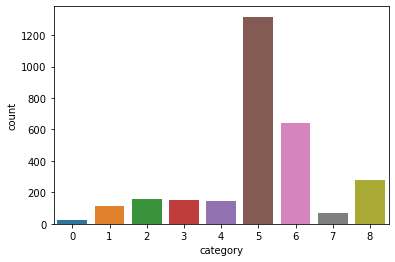

In [5]:
# plot the number of positive and negative feedback
sns.countplot(df['category'], label="Count")

<AxesSubplot:xlabel='rating', ylabel='count'>

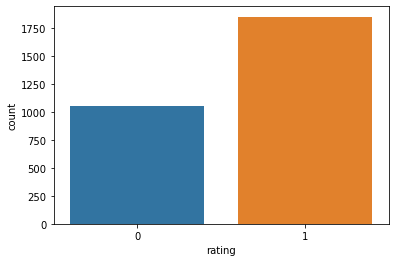

In [6]:
sns.countplot(df['rating'], label="rating")

In [7]:
df.corr()

,userId,timestamp,review,item,rating,helpfulness,gender,category
userId,1.000000,-0.036399,0.013212,-0.002618,0.010844,-0.016841,0.056183,0.015408
timestamp,-0.036399,1.000000,-0.025036,0.024337,0.011579,0.003638,-0.049244,0.037118
review,0.013212,-0.025036,1.000000,0.168119,-0.046935,0.016170,-0.014422,0.012047
item,-0.002618,0.024337,0.168119,1.000000,0.013629,-0.010780,0.006231,-0.054699
rating,0.010844,0.011579,-0.046935,0.013629,1.000000,-0.016850,0.022576,-0.116312
helpfulness,-0.016841,0.003638,0.016170,-0.010780,-0.016850,1.000000,-0.046627,-0.000189
gender,0.056183,-0.049244,-0.014422,0.006231,0.022576,-0.046627,1.000000,-0.017644
category,0.015408,0.037118,0.012047,-0.054699,-0.116312,-0.000189,-0.017644,1.000000


#### Try to train a model with all features

- Based on the correlation matrix, it seems that feedback has weak correlation with all the rest features
- First try to train a model with all features

In [8]:
from sklearn.model_selection import train_test_split

# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['rating'], axis=1), df['rating'], stratify=df['rating'], test_size=.2, random_state=7)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (2319, 7)
y_train shape:  (2319,)
X_test shape:  (580, 7)
y_test.shape:  (580,)


In [9]:
X_train.columns

Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category'],
      dtype='object')

In [10]:
from sklearn.linear_model import LogisticRegression

# training model with all features
lr = LogisticRegression().fit(X_train, y_train)

# Evaluating trained model on training and test set
from sklearn.metrics import accuracy_score

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test))

Acc on training set:  0.6369124622682191
Acc on test set:  0.6344827586206897


#### Try to tune the model for further improvements

- The model performance is poor by using all features, i.e., 63%, which is quite close to random guessing
- Try to tune the model b
y using RFE to select most important features
- Try to train a model with the selected important features

In [11]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 3)
rfe_model = rfe.fit(X_train, y_train)
print("No. of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Features ranking: ", rfe_model.ranking_)

No. of features:  3
Selected features:  [False False False False  True  True  True]
Features ranking:  [4 5 3 2 1 1 1]


In [12]:
X_train.columns

Index(['userId', 'timestamp', 'review', 'item', 'helpfulness', 'gender',
       'category'],
      dtype='object')

#### Try to train a model with most important features

- The results from the RFE show that userId, movieId and timestamp is the most important features
- Try to re-trian the model with three most important features 
- You may also try to tune the model by changing the value of C

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#X_train, X_test, y_train, y_test = train_test_split(df.drop(['rating', 'age', 'gender', 'genre', 'occupation'], axis=1), df['feedback'], stratify=df['feedback'], test_size=.2, random_state=7)

# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['userId', 'timestamp', 'review', 'item', 'rating'], axis=1), df['rating'], stratify=df['rating'], test_size=.2, random_state=7)


# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

# training model with the top-3 features
lr = LogisticRegression().fit(X_train, y_train)

# making predictions on training and test set
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train, y_pred_train))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test, y_pred_test))

X_train shape:  (2319, 3)
y_train shape:  (2319,)
X_test shape:  (580, 3)
y_test.shape:  (580,)
Acc on training set:  0.6377749029754204
Acc on test set:  0.6379310344827587


#### Train a more advanced model

- Based on the above results, the accuracy achieved by the simple logistic regression is poor
- Try to train a more advanced KNN model

In [14]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [15]:
# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['rating'], axis=1), df['rating'], stratify=df['rating'], test_size=.2, random_state=7)

In [16]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 7)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.5844827586206897


#### Automatic model hyperparameter (algorithm parameter) tuning

- The accuracy achieved by KNN is around 65%, which far exceeds that achieved by simple logistic regression, which demonstrate the superiority of the more advanced method on the classification problem
- Try to tune the model to see whether we can get more accurate results

In [17]:
from sklearn.model_selection import GridSearchCV

# Define search space for parameters
parameter_grid = {'n_neighbors': range(5, 80)}

X = df.drop(['rating'], axis=1)
y = df['rating']

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=5)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  48
The accuracy:  0.6357358108510511
